In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('German Credit Dataset.csv')

In [3]:
dataset.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
dataset.shape

(1000, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [6]:
dataset.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [7]:
# There are no missing values

In [8]:
dataset.duplicated().sum()

0

In [9]:
# There are no duplicate values

### Exploratory Data Analysis

In [10]:
# Credit History

dataset['credit_history'].value_counts()

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

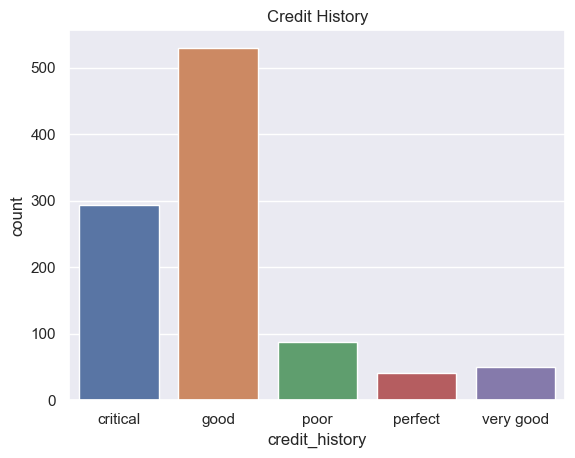

In [11]:
sns.countplot(x='credit_history', data = dataset)
plt.title('Credit History')
plt.show()

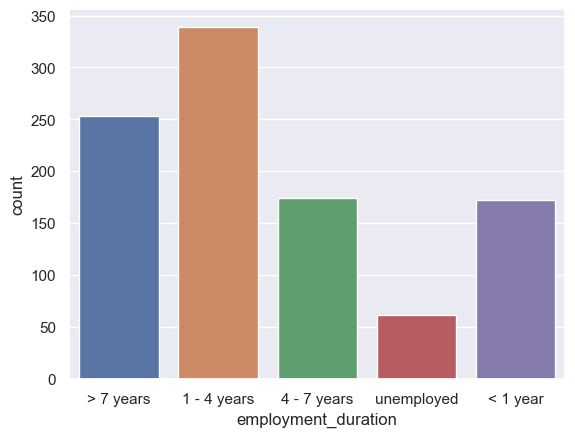

In [12]:
sns.countplot(x='employment_duration',data=dataset)
plt.show()

### Outlier Treatment

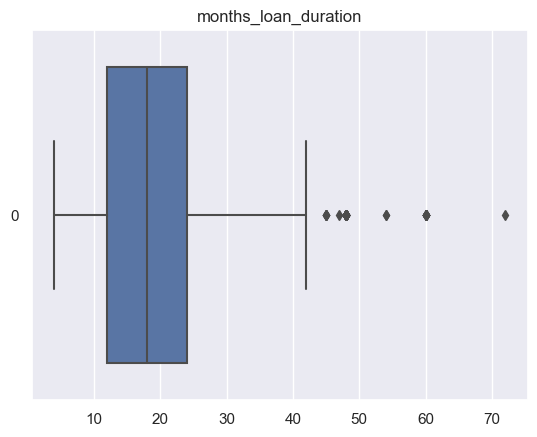

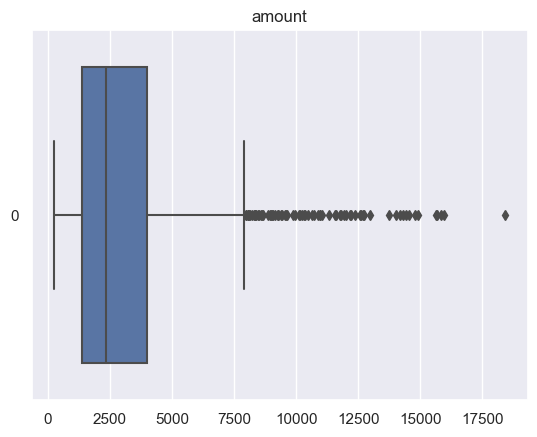

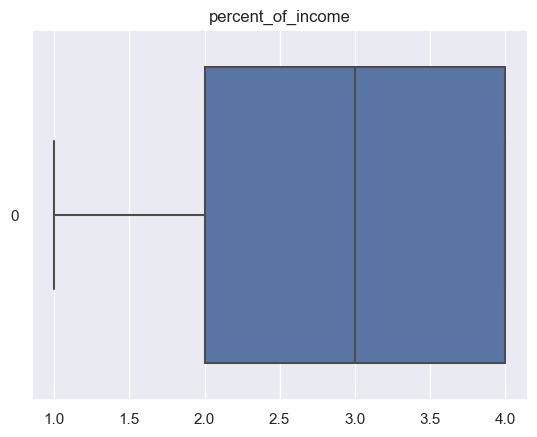

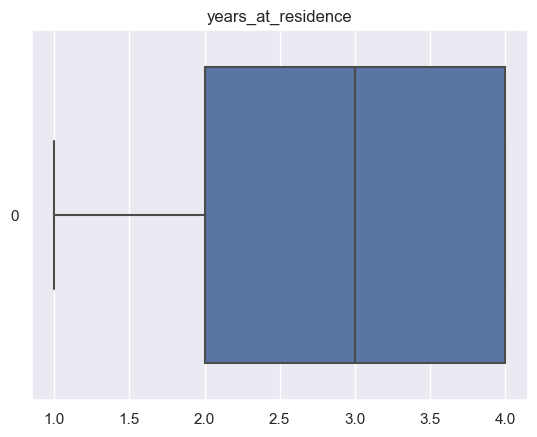

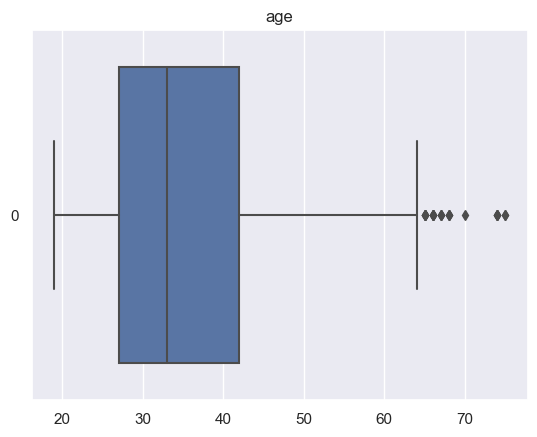

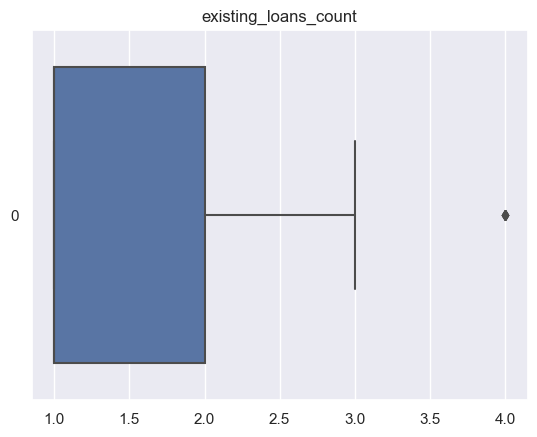

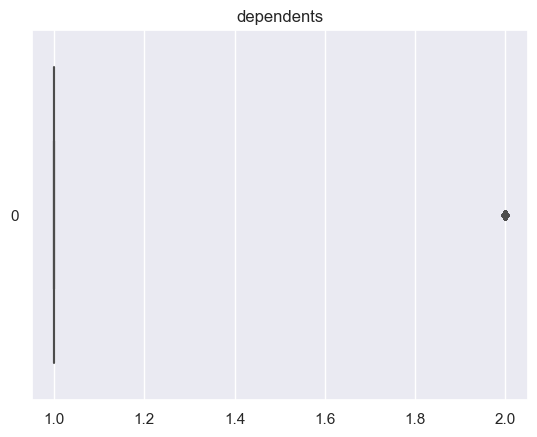

In [13]:
def boxplots(col):
    sns.boxplot(dataset[col],orient='h')
    plt.title(col)
    plt.show()
    
for i in dataset.select_dtypes(exclude='object').columns[0:]:
    boxplots(i)

In [14]:
# Variables having outliers which needs to be handled by capping method - 
# months_loan_duration,amount, existing_loans_count

In [15]:
def cap_outlier(col):
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    
    return dataset[col].clip(lower,upper, inplace=True)

In [16]:
cap_outlier('months_loan_duration')

cap_outlier('amount')

cap_outlier('existing_loans_count')

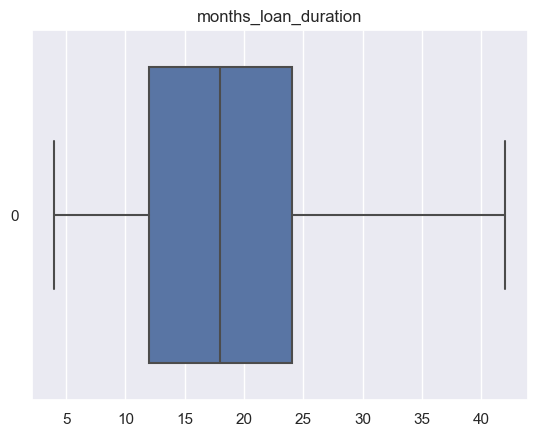

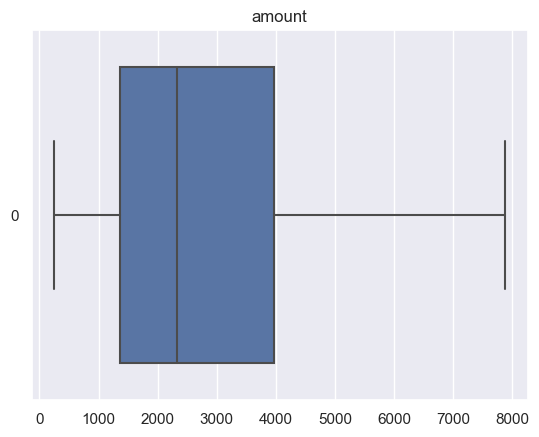

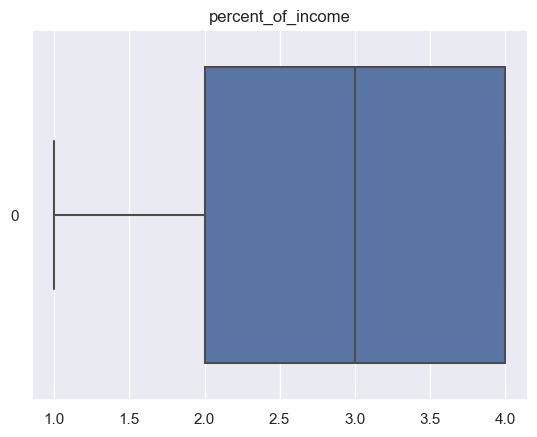

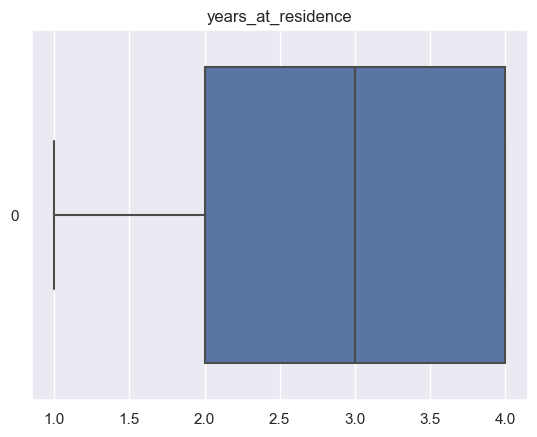

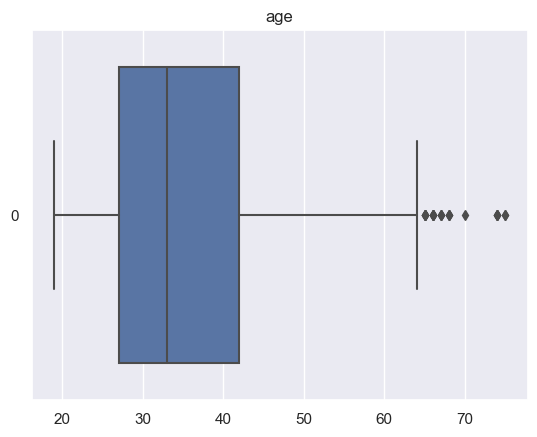

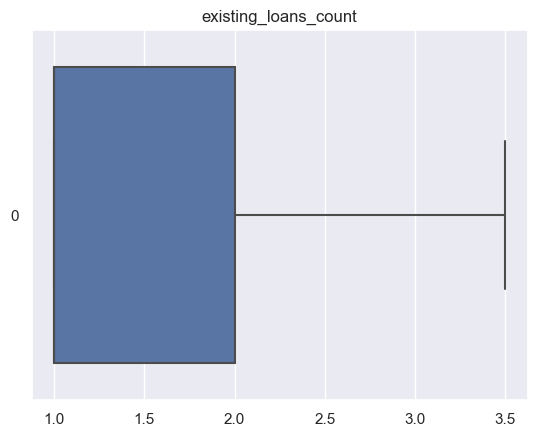

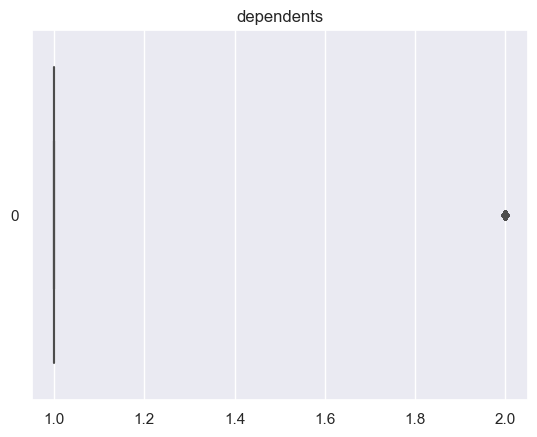

In [17]:
# Checking outliers again

for i in dataset.select_dtypes(exclude='object').columns[0:]:
    boxplots(i)

In [18]:
# All the outliers are successfully handled

### One Hot Encoding

In [19]:
cat_columns = []

for i in dataset:
    if dataset[i].dtype=='object':
        cat_columns.append(i)

In [20]:
cat_columns

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone',
 'default']

In [21]:
dataset = pd.get_dummies(dataset, columns=cat_columns)

In [22]:
dataset.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,...,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,default_no,default_yes
0,6,1169.0,4,4,67,2.0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
1,42,5951.0,2,2,22,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096.0,2,3,49,1.0,2,0,0,0,...,1,0,0,0,0,1,1,0,1,0
3,42,7882.0,2,4,45,1.0,2,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,24,4870.0,3,4,53,2.0,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [23]:
# Dropping the n-1 columns to avoid multi colinearity
dataset.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'checking_balance_1 - 200 DM', 'checking_balance_< 0 DM',
       'checking_balance_> 200 DM', 'checking_balance_unknown',
       'credit_history_critical', 'credit_history_good',
       'credit_history_perfect', 'credit_history_poor',
       'credit_history_very good', 'purpose_business', 'purpose_car',
       'purpose_car0', 'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'savings_balance_100 - 500 DM',
       'savings_balance_500 - 1000 DM', 'savings_balance_< 100 DM',
       'savings_balance_> 1000 DM', 'savings_balance_unknown',
       'employment_duration_1 - 4 years', 'employment_duration_4 - 7 years',
       'employment_duration_< 1 year', 'employment_duration_> 7 years',
       'employment_duration_unemployed', 'other_credit_bank',
       'other_credit_none', 'other_credit_store', 'housing_other',
     

In [24]:
dataset = dataset.drop(['checking_balance_1 - 200 DM','credit_history_critical','purpose_business',
              'savings_balance_100 - 500 DM','employment_duration_1 - 4 years','other_credit_bank',
             'housing_other','job_management','phone_no','default_no'],axis=1)
dataset.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes,default_yes
0,6,1169.0,4,4,67,2.0,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
1,42,5951.0,2,2,22,1.0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12,2096.0,2,3,49,1.0,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3,42,7882.0,2,4,45,1.0,2,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,24,4870.0,3,4,53,2.0,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [25]:
# Splitting data into dependent and independent variable

x = dataset.drop(['default_yes'],axis=1)
y = dataset[['default_yes']]

In [26]:
x.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
0,6,1169.0,4,4,67,2.0,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1
1,42,5951.0,2,2,22,1.0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,12,2096.0,2,3,49,1.0,2,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,42,7882.0,2,4,45,1.0,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,24,4870.0,3,4,53,2.0,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [27]:
y.head()

,default_yes
0,0
1,1
2,0
3,0
4,1


In [41]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)

In [28]:
# Check for Imbalance Data

In [29]:
dataset['default_yes'].value_counts()

0    700
1    300
Name: default_yes, dtype: int64

In [42]:
# Data is imbalance
# Balance the Data using RandomOver Sampler

from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(sc_x,y)

In [43]:
y_over.value_counts()

default_yes
0              700
1              700
dtype: int64

### Splitting data into train and test

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, random_state=1, train_size=0.75)

### 1. Building Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [46]:
lrm = lr.fit(x_train,y_train)

/Users/Sumit/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
y_pred_train_lrm = lrm.predict(x_train)
y_pred_test_lrm = lrm.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
print(accuracy_score(y_train,y_pred_train_lrm))
print('*****************************************')
print(accuracy_score(y_test,y_pred_test_lrm))

0.7504761904761905
*****************************************
0.7114285714285714
